Random Forest

In [ ]:
import sys
import os

# Add the project root to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from models.mnist_classifier_interface import MnistClassifierInterface
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Convert 28x28 images to vectors
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalization
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [ ]:
class RandomForestClassifierMnist(MnistClassifierInterface):
    """
    Random Forest model for MNIST classification.
    """

    def __init__(self, n_estimators=100):
        self.model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

In [ ]:
# Create a model object
rf_classifier = RandomForestClassifierMnist()

In [ ]:
# Training the model
rf_classifier.train(X_train, y_train)

In [ ]:
# Testing predictions
predictions = rf_classifier.predict(X_test)

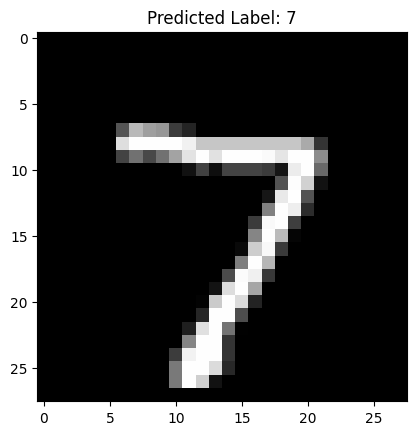

In [ ]:
# Visualize the first prediction
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted Label: {predictions[0]}")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9704


In [ ]:
print("X_test form:", X_test.shape)
print("Y_test form:", y_test.shape)


Форма X_test: (10000, 784)
Форма y_test: (10000,)


Feed-Forward Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Normalize pixels (range 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0


In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Creating a neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # Randomly turn off 20% of the neurons in this layer
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8567 - loss: 0.4898 - val_accuracy: 0.9593 - val_loss: 0.1388
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9554 - loss: 0.1479 - val_accuracy: 0.9690 - val_loss: 0.1020
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9684 - loss: 0.1046 - val_accuracy: 0.9723 - val_loss: 0.0879
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9740 - loss: 0.0845 - val_accuracy: 0.9768 - val_loss: 0.0752
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9788 - loss: 0.0698 - val_accuracy: 0.9781 - val_loss: 0.0727
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9796 - loss: 0.0632 - val_accuracy: 0.9783 - val_loss: 0.0680
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9826 - loss: 0.0551 - val_accuracy: 0.9784 - val_loss: 0.0697
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0498 

In [ ]:
# Evaluate accuracy on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"✅ Accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9801 - loss: 0.0658
✅ Accuracy: 0.9801


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


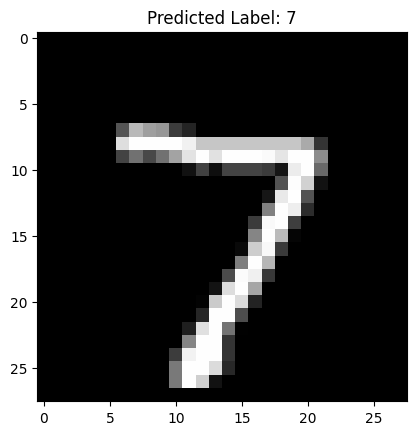

In [ ]:
# Visualize predictions
def plot_prediction(index):
    plt.imshow(X_test[index], cmap="gray")
    prediction = np.argmax(model.predict(X_test[index].reshape(1, 28, 28)))
    plt.title(f"Predicted Label: {prediction}")
    plt.show()

plot_prediction(0)  # Draw the first example from the test set

Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
# Convert 28x28 to (28,28,1) format for convolutional layers
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
# One-hot encoding of tags
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
# Creating a CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Add EarlyStopping (stop after 3 epochs without improvements)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 168s 88ms/step - accuracy: 0.8768 - loss: 0.3849 - val_accuracy: 0.9845 - val_loss: 0.0461
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 165s 88ms/step - accuracy: 0.9745 - loss: 0.0854 - val_accuracy: 0.9878 - val_loss: 0.0360
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 88ms/step - accuracy: 0.9799 - loss: 0.0646 - val_accuracy: 0.9900 - val_loss: 0.0310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 206s 90ms/step - accuracy: 0.9844 - loss: 0.0531 - val_accuracy: 0.9907 - val_loss: 0.0294
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 197s 87ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9921 - val_loss: 0.0273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 89ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9916 - val_loss: 0.0306
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 200s 88ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9884 - val_loss: 0.0447


In [ ]:
# Accuracy assessment
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"✅ Accuracy: {test_acc:.4f}")

313/313 - 7s - 22ms/step - accuracy: 0.9921 - loss: 0.0273
✅ Accuracy: 0.9921


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


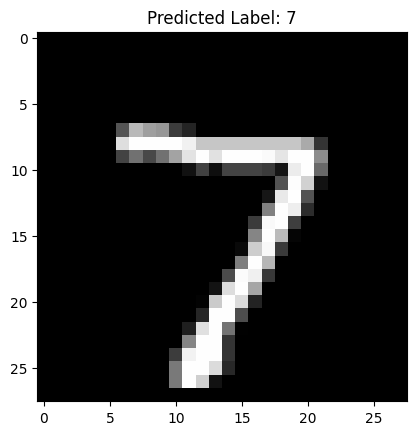

In [ ]:
# Function for testing predictions
def plot_prediction(index):
    plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
    prediction = np.argmax(model.predict(X_test[index].reshape(1, 28, 28, 1)))
    plt.title(f"Predicted Label: {prediction}")
    plt.show()

plot_prediction(0)  # Test the prediction for the first image